In [2]:
import pandas as pd

C:\Users\beall\AppData\Local\Temp\ipykernel_12020\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('sample.csv')
values = df['Value']


In [4]:
import scipy.stats as ss
normfit = ss.norm.fit(values)
lognormfit = ss.lognorm.fit(values, floc = 0)
gammafit = ss.gamma.fit(values, floc = 0)

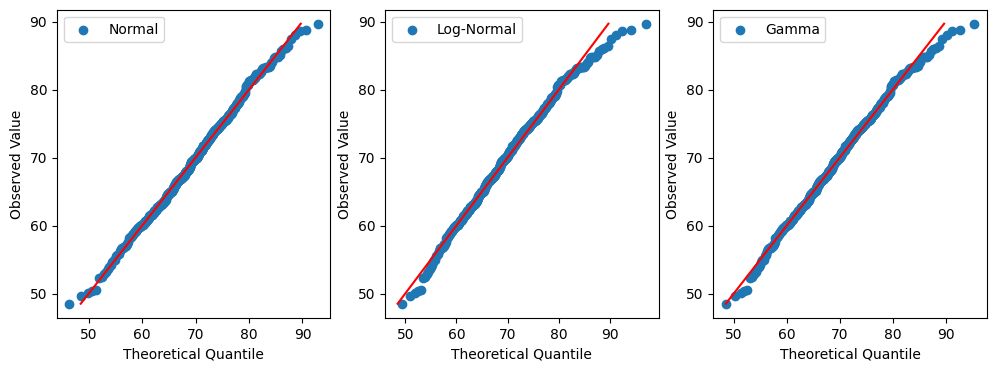

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize= (12,4))

#SciPy contains 'probplot', which can be used to extract the theoretical quantiles for our selected distributions vs. the data
# Note: 'fit' will fit a best-fit line to our probability plot. Let's not do that (which is why it is set to False), as we will instead add a 45-degree red line shortly)
# Full documentation can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

norm = ss.probplot(values, sparams = normfit, dist = ss.norm, plot=None, fit = False)
lognorm = ss.probplot(values, sparams = lognormfit, dist = ss.lognorm, plot=None, fit = False)
gamma = ss.probplot(values, sparams = gammafit, dist = ss.gamma, plot=None, fit = False)

ax[0].scatter(norm[0], norm[1], label = 'Normal')
ax[1].scatter(lognorm[0], lognorm[1], label = 'Log-Normal')
ax[2].scatter(gamma[0], gamma[1], label = 'Gamma')


for i in range(3):
    ax[i].plot([min(values),max(values)], [min(values), max(values)], color = 'r')
    ax[i].set_xlabel('Theoretical Quantile')
    ax[i].set_ylabel('Observed Value')
    ax[i].legend()

plt.show()